In [1]:
import sys
import numpy as np
import matplotlib.pyplot as plt
sys.path.append(r"C:\Users\DGaard\Desktop\Gits\MoleculeSim\ownSim")

import forces as fc
import molecules as mc

In [2]:
pH = 6.7
m1 = mc.Molecule(np.array([0.0,0.0,0.0]),50)
m2 = mc.Molecule(np.array([200.0,0.0,0.0]),50)


#mc.dist(m1,m2)


print(fc.vdw(m1,m2))
#print(fc.steric(m1,m2))
#print(fc.elec_rep(m1,m2))

-0.000664099035814288


[2.8280268508087977e-08, 2.3453130695303327e-08, 1.926456248910934e-08, 1.5685340166709203e-08, 1.2670574722996221e-08, 1.0164482712140877e-08, 8.105536144179506e-09, 6.431132633632033e-09, 5.081248636346852e-09, 4.000890917867361e-09, 3.1414300543892114e-09, 2.461045849660391e-09, 1.924554989512938e-09, 1.5028653857553605e-09, 1.1722467635840605e-09, 9.135482280492845e-10, 7.114435007807857e-10, 5.537472722511177e-10, 4.308210122026658e-10, 3.3507111931025807e-10, 2.605336980777644e-10, 2.0253616943733934e-10, 1.57424594202311e-10, 1.223458116529946e-10, 9.50744967098458e-11, 7.387655144385239e-11, 5.7401605735509955e-11, 4.459867084630899e-11, 3.465010803482888e-11, 2.6920025044322102e-11, 2.0914002146728075e-11, 1.6247693035826994e-11, 1.2622364623946795e-11, 9.805854220458699e-12, 7.61775145202647e-12, 5.917871983245812e-12, 4.597294389827599e-12, 3.571391784167643e-12, 2.7744152125798353e-12, 2.1552838390141673e-12, 1.674313397809836e-12, 1.3006740068283213e-12, 1.0104148635345448

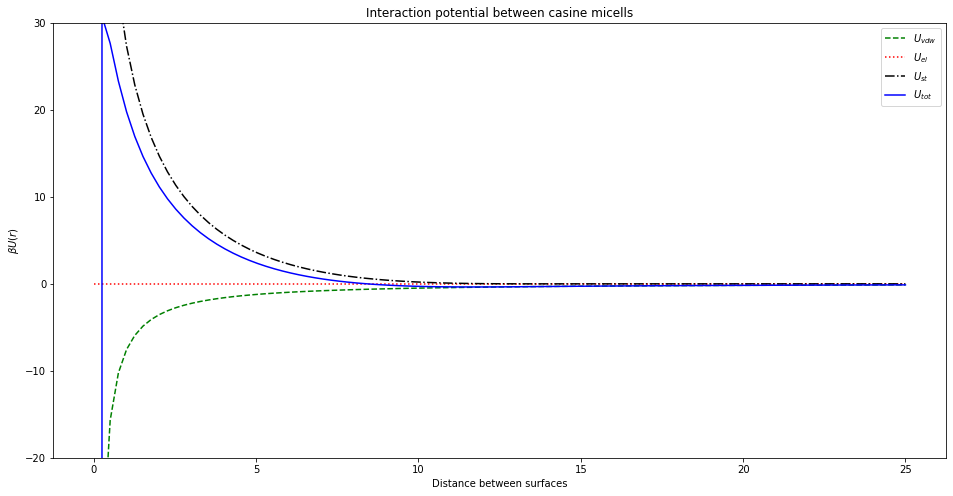

In [3]:
dists = np.linspace(0.00001,25,100)
vdws = []
ess = []
sters = []


for i in dists:
  radius = 100
  dist_between = 2*radius + i
  tm1 = mc.Molecule(np.array([0.0,0.0,0.0]),radius)
  tm2 = mc.Molecule(np.array([dist_between,0.0,0.0]),radius)
  vdws.append(fc.vdw(tm1,tm2))
  ess.append(fc.elec_rep(tm1,tm2))
  #ess.append(fc.elec_repv2(tm1,tm2))
  #ess.append(fc.elec_rep3(tm1,tm2))
  sters.append(fc.steric(tm1,tm2))

#print(dists)
#print(vdws)
print(ess)
#print(sters)

total_fs = [v + e + s for (v,e,s) in zip(vdws,ess,sters)]


plt.figure(figsize=(16,8))

plt.plot(dists, vdws, c="green", label = "$U_{vdw}$", linestyle='--')
plt.plot(dists,ess,c="red",label="$U_{el}$",linestyle=":")
plt.plot(dists,sters,color = "black", label="$U_{st}$",linestyle="-.")
plt.plot(dists,total_fs,color = "blue", label="$U_{tot}$")

plt.ylim((-20,30))
plt.title("Interaction potential between casine micells")
plt.xlabel("Distance between surfaces")
plt.ylabel(r"$\beta U(r)$")
plt.legend()
plt.show()

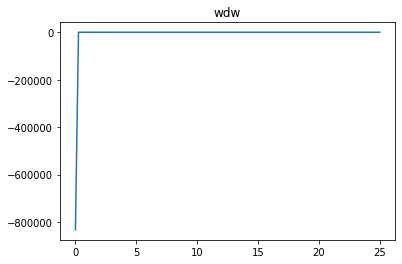

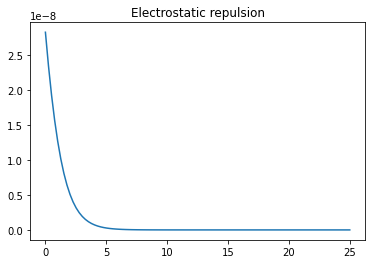

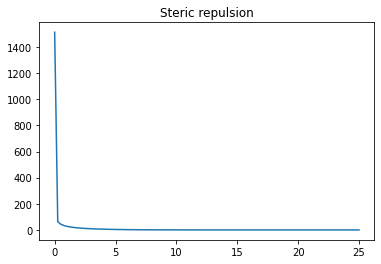

In [4]:
plt.plot(dists,vdws)
plt.title("wdw")
plt.show()
plt.plot(dists,ess)
plt.title("Electrostatic repulsion")
plt.show()
plt.plot(dists,sters)
plt.title("Steric repulsion")
plt.show()

In [5]:
print(sters)

[1512.5770940419359, 62.85640103981113, 43.3320747824736, 33.55768948305698, 27.32250714299187, 22.88110727139422, 19.509585118557737, 16.842128543826334, 14.669744240646025, 12.86250968042076, 11.33449493366766, 10.026100641962108, 8.89440319256649, 7.907527491979487, 7.041193762458428, 6.276506722611698, 5.59848902312325, 4.995078570374474, 4.456424945332762, 3.97438439288577, 3.54215005502733, 3.153976414492174, 2.804970690527806, 2.4909326736167263, 2.2082301733757714, 1.9537010336618628, 1.7245752305305801, 1.5184123358113681, 1.3330508679820456, 1.1665669335870854, 1.0172401983261374, 0.8835256914044753, 0.7640302899614692, 0.6574929867742149, 0.5627682378764786, 0.47881183406260297, 0.40466885344042114, 0.3394633398843681, 0.2823894206912238, 0.23270363056726898, 0.18971825169088483, 0.15279551355339707, 0.12134252350739072, 0.09480682090700432, 0.07267246552717349, 0.05445658545956868, 0.03970632156896156, 0.02799611537709444, 0.018925295328410426, 0.012115923108163219, 0.00721